# Week 2
## 1.
Construct a linear regression of weight as predicted by height, using the
adults (age 18 or greater) from the Howell1 dataset. The heights listed below
were recorded in the !Kung census, but weights were not recorded for these
individuals. Provide predicted weights and 89% compatibility intervals for
each of these individuals. That is, fill in the table below, using model-based
predictions.

| Individual | height | expected weight | 89% interval

1 | 140

2 | 160

3 | 175

In [1]:
import numpy as np
heights=np.array([140, 160, 175])

In [2]:
import pandas as pd
data=pd.read_csv('data/Howell1.csv', sep=';')
data=data[data['age']>18]
data

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
534,162.560,47.031821,27.0,0
537,142.875,34.246196,31.0,0
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0


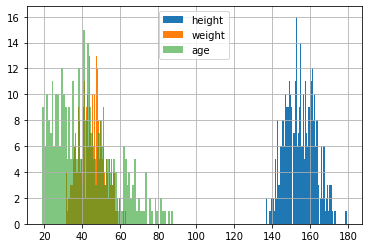

In [3]:
data.height.hist(bins=70, legend=True);
data.weight.hist(bins=70, legend=True);
data.age.hist(bins=70,alpha=.6, legend=True);


In [4]:
# data.height-=data.height.mean()

In [5]:
import bayes_window as baw

In [6]:
bw=baw.BayesWindow(df=data, y='height', treatment='weight')
bw.plot(x='weight', color='male', add_box=False)


alt.LayerChart(...)

In [10]:
import numpyro.distributions as dist
br=baw.BayesRegression(bw,dist_slope=dist.LogNormal).fit(center_intercept=True)

In [11]:
br.plot( add_data=False)

alt.LayerChart(...)

In [12]:
from scipy import stats
stats.norm.rvs(loc=br.posterior['intercept']['intercept center interval'].values[0] +
               br.posterior['slope']['center interval'].values * heights, scale=br.posterior['sigma_obs'])

array([155.62408364, 151.33515418, 157.31371759])

# 2. 
From the Howell1 dataset, consider only the people younger than 13 years
old. Estimate the causal association between age and weight. Assume that
age influences weight through two paths. First, age influences height, and
height influences weight. Second, age directly influences weight through agerelated changes in muscle growth and body proportions. All of this implies
this causal model (DAG):

A ->  ->

H ->

W

Use a linear regression to estimate the total (not just direct) causal effect of
each year of growth on weight. Be sure to carefully consider the priors. Try
using prior predictive simulation to assess what they imply.


In [13]:
import pandas as pd
data=pd.read_csv('data/Howell1.csv', sep=';')
data=data[data['age']<13]
data

,height,weight,age,male
18,121.920,19.617854,12.0,1
19,105.410,13.947954,8.0,0
20,86.360,10.489315,6.5,0
24,109.220,15.989118,7.0,0
30,114.300,17.860185,11.0,1
...,...,...,...,...
531,87.630,10.659412,6.0,0
535,114.935,17.519991,7.0,1
536,67.945,7.229122,1.0,0
538,76.835,8.022908,1.0,1


In [14]:
bw=baw.BayesWindow(df=data, y='age', treatment='weight', )
bw.plot(x='weight', add_box=False)
br=baw.BayesRegression(bw,dist_slope=dist.LogNormal).fit(center_intercept=True)


In [15]:
br.plot(add_data=False)

alt.LayerChart(...)


# 3. 
Now suppose the causal association between age and weight might be different for boys and girls. Use a single linear regression, with a categorical
variable for sex, to estimate the total causal effect of age on weight separately
for boys and girls. How do girls and boys differ? Provide one or more posterior contrasts as a summary.

In [16]:
bw=baw.BayesWindow(df=data, y='height', treatment='weight', condition=['male'])
bw.plot(x='weight', color='male', add_box=False)


alt.LayerChart(...)

In [17]:
br=baw.BayesRegression(bw,dist_slope=dist.LogNormal).fit(center_intercept=True)

n(Divergences) = 2


In [18]:
br.plot(x='male', add_data=False)

alt.LayerChart(...)

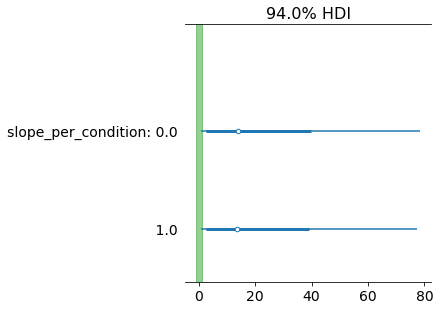

In [19]:
import arviz as az
az.plot_forest(br.trace,var_names='slope_per_condition', combined=True, rope=[-1,1]);

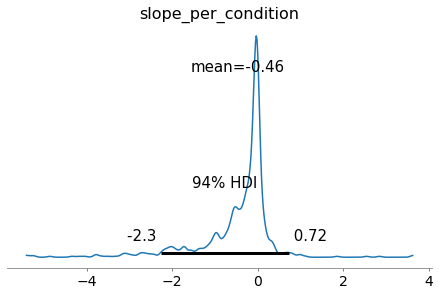

In [20]:
az.plot_posterior(br.trace.posterior['slope_per_condition'].sel(male=1)-
                  br.trace.posterior['slope_per_condition'].sel(male=0));

In [ ]:
# from numpyro.infer import Predictive
# Predictive(br.mcmc,num_samples=100).posterior_samples